### 선형회귀 - 예측

In [80]:
# from sklearn import svm,metrics
# from sklearn.neighbors import KNeighborsClassifier # 분류
# from sklearn.neighbors import KNeighborsRegressor  # 회귀-예측
from sklearn.linear_model import LinearRegression  # 선형회귀
from sklearn.preprocessing import PolynomialFeatures # 다항특성을 만들어주는 라이브러리
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False  # 마이너스 표시 해결
# 한글설정
matplotlib.rcParams['font.family'] = 'AppleGothic' # Mac사용자
matplotlib.rcParams['font.size'] = '10' # 글자크기

In [81]:
df = pd.read_csv('https://bit.ly/perch_csv')
perch_full = df.to_numpy()

In [82]:
# target
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [83]:
ser = pd.Series(perch_weight)

In [84]:
ser.info()

<class 'pandas.core.series.Series'>
RangeIndex: 56 entries, 0 to 55
Series name: None
Non-Null Count  Dtype  
--------------  -----  
56 non-null     float64
dtypes: float64(1)
memory usage: 580.0 bytes


In [85]:
# null, 0, 피쳐 값 분포, 타입
# str 처리는 어떻게 할 지
# - 아스키 코드 변경
# - 원핫인코딩
# - drop 삭제

In [86]:
df.info() # 타입, non 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   length   56 non-null     float64
 1    height  56 non-null     float64
 2    width   56 non-null     float64
dtypes: float64(3)
memory usage: 1.4 KB


In [87]:
# 선형회귀 - 표준화작업이 필요가 없음. 특성추가, 규제 - 표준화작업이 필요
df.describe() # 각피쳐 데이터 분포

,length,height,width
count,56.000000,56.000000,56.000000
mean,27.892857,7.862143,4.745536
std,9.021668,2.878343,1.775006
min,8.400000,2.110000,1.410000
25%,21.825000,5.690000,3.520000
50%,25.300000,6.920000,4.155000
75%,36.625000,10.850000,6.450000
max,44.000000,12.800000,8.140000


In [88]:
from sklearn.model_selection import train_test_split
train_input,test_input,train_target,test_target = train_test_split(
    perch_full, perch_weight, random_state=42
)

In [89]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)

LinearRegression()

In [90]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9559326821885706
0.8796419177546368


In [91]:
# 특성을 추가해서 모델을 적용
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input) # 특성이 추가됨.
test_poly = poly.transform(test_input)

In [92]:
lr = LinearRegression()
lr.fit(train_poly,train_target)

LinearRegression()

In [93]:
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9999999999997239
-144.40492666629603


In [94]:
# 규제 - 릿지규제, 라쏘 규제
# 규제를 적용하려면, 표준화 작업이 필요
# 변환기
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
ss.fit(train_poly)
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [95]:
# 릿지 규제
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(train_scaled, train_target)

Ridge()

In [96]:
ridge.score(train_scaled,train_target)

0.9896101671037343

In [97]:
ridge.score(test_scaled,test_target)

0.979069397761538

In [98]:
# Ridge(alpha=규제) # 0.0001,0.01,0.1,1,10,100

In [99]:
train_score = []
test_score = []
alpha_list = [0.001,0.01,0.1,1,10,100] # 6개

for alpha in alpha_list:
    ridge = Ridge(alpha=alpha)
    ridge.fit(train_scaled,train_target)
    train_score.append(ridge.score(train_scaled,train_target))
    test_score.append(ridge.score(test_scaled,test_target))

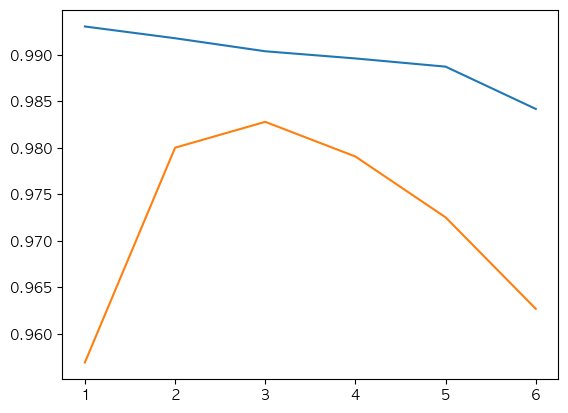

In [100]:
x = np.arange(1,7).reshape(-1,1)
plt.plot(x,train_score)
plt.plot(x,test_score)

In [101]:
ridge = Ridge(alpha=0.1)
ridge.fit(train_scaled,train_target)
print(ridge.score(train_scaled,train_target))
print(ridge.score(test_scaled,test_target))

0.9903815817570366
0.9827976465386896


In [102]:
# 선형회귀
# - 1. 모델구현, 테스트
# - 2. 특성을 추가해서 테스트
# - 3. 특성을 degree 계속늘려서 테스트
# - 4. train 예측률은 높은데, test 예측률 너무 낮으면
# - 5. 규제를 통해 test 예측률을 높임.
# - 6. 규제 alpha값을 변동을 해서, 예측률이 가장 높은 alpha값을 채택해서 최종 모델 구현